<a href="https://colab.research.google.com/github/jd2504/bph-research/blob/master/SiR_survey_round1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Survey results (round 1)

This code block allows you to connect this Colab notebook to your Google Drive. The URL below is the survey results.

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

Import the libraries we'll use later

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Here is the URL for the survey data. Read those data into a pandas dataframe.

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1heNYAt90RMDM8u759uK3zfs9ykTQ819H9tkg15lbiEo/export?format=csv'
resp = gc.open_by_url(url).sheet1.get_all_values()
data = pd.DataFrame.from_records(resp)

Look at what we've read in...

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,Timestamp,What social media app do you use the most?,What type of content do you usually like to wa...,How long are you on social media daily?,"Do you consider yourself ever ""doom-scrolling""?",How is your mood after using social media?,Could you spend a day without using social media?,Can social media have a big influence on being...,Rate your mental health on a scale of 1-10\n\n,How often do you look at the comments?
1,2/5/2026 13:18:37,TikTok,Entertainment,more than 5 hours,Yes,1,No,Yes,3,2
2,2/5/2026 13:22:14,TikTok,News,more than 5 hours,Yes,2,Yes,Yes,6,2
3,2/5/2026 13:30:57,TikTok,Entertainment,1 - 2 hours,Yes,3,No,Yes,3,3
4,2/5/2026 13:58:25,YouTube,Education,more than 5 hours,Yes,1,Yes,Yes,7,2


It looks like there's an extra row of numbers. Treat the first row as the column names and get rid of the first line of numbers.

In [ ]:
data.columns = data.iloc[0]
data = data.iloc[1:]

In [ ]:
data.head()

,Timestamp,What social media app do you use the most?,What type of content do you usually like to watch on social media or engage with?,How long are you on social media daily?,"Do you consider yourself ever ""doom-scrolling""?",How is your mood after using social media?,Could you spend a day without using social media?,Can social media have a big influence on being able to cause someone to change their personal beliefs?,Rate your mental health on a scale of 1-10\n\n,How often do you look at the comments?
1,2/5/2026 13:18:37,TikTok,Entertainment,more than 5 hours,Yes,1,No,Yes,3,2
2,2/5/2026 13:22:14,TikTok,News,more than 5 hours,Yes,2,Yes,Yes,6,2
3,2/5/2026 13:30:57,TikTok,Entertainment,1 - 2 hours,Yes,3,No,Yes,3,3
4,2/5/2026 13:58:25,YouTube,Education,more than 5 hours,Yes,1,Yes,Yes,7,2
5,2/5/2026 14:11:56,Instagram,Food,1 - 2 hours,Yes,2,No,Yes,3,4


In [ ]:
# return unique values and a count of how many times they occur
data['How long are you on social media daily? '].value_counts()

,count
How long are you on social media daily?,
more than 5 hours,30
1 - 2 hours,22
more than 8 hours,2


Make the column names more friendly for analysis.

In [ ]:
column_recode = {
    'Timestamp': 'ts',
    'What social media app do you use the most?': 'most_used_app',
    'What type of content do you usually like to watch on social media or engage with?': 'content_type_pref',
    'How long are you on social media daily? ': 'time_spent_daily',
    'Do you consider yourself ever "doom-scrolling"?': 'doom_scrolling',
    'How is your mood after using social media? ': 'mood_after_use',
    'Could you spend a day without using social media?': 'can_go_without',
    'Can social media have a big influence on being able to cause  someone to change their personal beliefs?': 'influences_beliefs',
    'Rate your mental health on a scale of 1-10\n\n': 'mental_health',
    'How often do you look at the comments?': 'comment_freq'
}
data.rename(columns=column_recode, inplace=True)

data.head()

,ts,most_used_app,content_type_pref,time_spent_daily,doom_scrolling,mood_after_use,can_go_without,influences_beliefs,mental_health,comment_freq
1,2/5/2026 13:18:37,TikTok,Entertainment,more than 5 hours,Yes,1,No,Yes,3,2
2,2/5/2026 13:22:14,TikTok,News,more than 5 hours,Yes,2,Yes,Yes,6,2
3,2/5/2026 13:30:57,TikTok,Entertainment,1 - 2 hours,Yes,3,No,Yes,3,3
4,2/5/2026 13:58:25,YouTube,Education,more than 5 hours,Yes,1,Yes,Yes,7,2
5,2/5/2026 14:11:56,Instagram,Food,1 - 2 hours,Yes,2,No,Yes,3,4


In [ ]:
data['doom_scrolling'].value_counts()

,count
doom_scrolling,
Yes,49
No,5


In [ ]:
# what is the shape of my data?
# will return something like: (54,)
# interpret this as 54 rows, no columns
data['comment_freq'].shape

(54,)

Let's check how the data was read in.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 1 to 54
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ts                  54 non-null     object
 1   most_used_app       54 non-null     object
 2   content_type_pref   54 non-null     object
 3   time_spent_daily    54 non-null     object
 4   doom_scrolling      54 non-null     object
 5   mood_after_use      54 non-null     object
 6   can_go_without      54 non-null     object
 7   influences_beliefs  54 non-null     object
 8   mental_health       54 non-null     object
 9   comment_freq        54 non-null     object
dtypes: object(10)
memory usage: 4.3+ KB


Numeric fields like `mental_health` and `comment_freq` look like they've been coded as objects instead of numbers. Let's recode those.

In [ ]:
data['mental_health'] = data['mental_health'].astype(int)
data['comment_freq'] = data['comment_freq'].astype(int)

Let's start looking at the data.

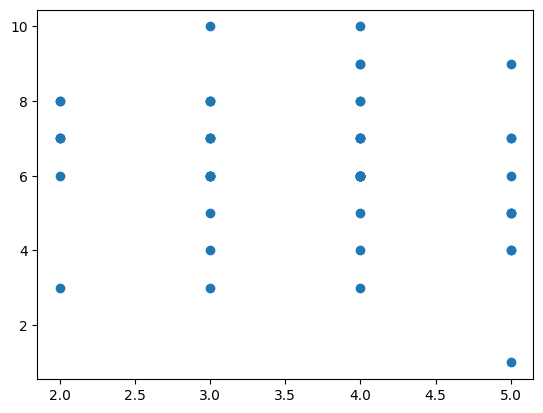

In [ ]:
plt.scatter(data['comment_freq'], data['mental_health'])
plt.show()